In [24]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
import pandas as pd

In [26]:
def display_graph(g):
    elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] > 5]
    esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] <= 5]

    pos = nx.spring_layout(g)  # positions for all nodes

    plt.figure(figsize=(15,15))


    # nodes
    nx.draw_networkx_nodes(g, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(g, pos, edgelist=elarge,
                           width=6)
    nx.draw_networkx_edges(g, pos, edgelist=esmall,
                           width=2, alpha=0.5, edge_color='b')

    # labels
    nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')

    plt.axis('off')
    plt.show()

    return None

In [4]:
def standardize_names(g):

    new_names = {'BlackWidow':'Black_Widow',
             'Captin_America':'Captain_America','CaptainAmerica':'Captain_America',
             'Clint_Barton':'Hawkeye',
             'Iron_Man':'IronMan',
             'NickFury':'Nick_Fury',
             'ScarletWitch':'Scarlet_Witch',
             'WarMachine':'War_Machine'}

    fixes = set(new_names.keys()) - set(g.nodes())
    
    for fix in fixes:
        del new_names[fix]
        
    return nx.relabel_nodes(g, new_names)

In [5]:
def combine_weighted_graphs(g,h):
    ''' Need special function to combined graphs with weighted edges where you want the weights of edges
    in both graphs to be added together'''
    
    combined = nx.Graph()

    # standardize edge name ordering
    g_edges = [tuple(sorted(x)) for x in g.edges]
    h_edges = [tuple(sorted(x)) for x in h.edges]
  
    add_weights_edges = set(g_edges) & set(h_edges)
    
    for edge in add_weights_edges:
        weight = g[edge[0]][edge[1]]['weight'] + h[edge[0]][edge[1]]['weight']
        combined.add_edge(edge[0], edge[1], weight=weight)
   
    # edges in g not in h
    unique_edges = set(g_edges) - set(h_edges)
    for edge in unique_edges:
        combined.add_edge(edge[0],edge[1], weight=g[edge[0]][edge[1]]['weight'])

    # edges in h not in g
    unique_edges = set(h_edges) - set(g_edges)
    for edge in unique_edges:
        combined.add_edge(edge[0],edge[1], weight=h[edge[0]][edge[1]]['weight'])
                       
    return combined

In [13]:
a1 = nx.read_edgelist('Avengers1_edge_list.txt', data=(('weight',float),))
a1 = standardize_names(a1)
a1_5percent = nx.read_edgelist('Avengers1_edge_list.txt', data=(('weight',float),))
a1_5percent = standardize_names(a1_5percent)
a1_10percent = nx.read_edgelist('Avengers1_edge_list.txt', data=(('weight',float),))
a1_10percent = standardize_names(a1_10percent)
a1_15percent = nx.read_edgelist('Avengers1_edge_list.txt', data=(('weight',float),))
a1_15percent = standardize_names(a1_15percent)

a2 = nx.read_edgelist('Avengers2_edge_list.txt', data=(('weight',float),))
a2 = standardize_names(a2)

combined = combine_weighted_graphs(a1,a2)

In [14]:
a1_list = list(a1.nodes)
a1_list

['Nick_Fury',
 'Agent_Hill',
 'Phil_Coulson',
 'Professor_Erik_Selvig',
 'Hawkeye',
 'Loki',
 'Black_Widow',
 'IronMan',
 'Hulk',
 'Captain_America',
 'Pepper_Potts',
 'Jarvis',
 'Thor',
 'Jane']

In [15]:
percent = round(len(a1_list)*0.05)
percent

1

Takes the length of the list and multiplies it by the percent of nodes you want pulled out.

In [32]:
percent10 = round(len(a1_list)*0.15) 
percent10

2

In [16]:
a1_l_s = random.sample(a1_list, percent)
a1_l_s

['Thor']

Randomly selects a node from the network that will be taken out later

In [33]:
a1_l_s2 = random.sample(a1_list, percent10)
a1_l_s2

['Hawkeye', 'Professor_Erik_Selvig']

In [17]:
a1.nodes

NodeView(('Nick_Fury', 'Agent_Hill', 'Phil_Coulson', 'Professor_Erik_Selvig', 'Hawkeye', 'Loki', 'Black_Widow', 'IronMan', 'Hulk', 'Captain_America', 'Pepper_Potts', 'Jarvis', 'Thor', 'Jane'))

In [18]:
#remove = [node for node,degree in dict(G.degree()).items() if degree > 2]
remove = a1_l_s
remove

['Thor']

In [19]:
a1_remove5 = a1_5percent.remove_nodes_from(remove)
a1_5percent.nodes()

NodeView(('Nick_Fury', 'Agent_Hill', 'Phil_Coulson', 'Professor_Erik_Selvig', 'Hawkeye', 'Loki', 'Black_Widow', 'IronMan', 'Hulk', 'Captain_America', 'Pepper_Potts', 'Jarvis', 'Jane'))

Removes the random node from the list of nodes

In [20]:
a1.nodes()

NodeView(('Nick_Fury', 'Agent_Hill', 'Phil_Coulson', 'Professor_Erik_Selvig', 'Hawkeye', 'Loki', 'Black_Widow', 'IronMan', 'Hulk', 'Captain_America', 'Pepper_Potts', 'Jarvis', 'Thor', 'Jane'))

Checks to make sure the node is not removed from the original list.

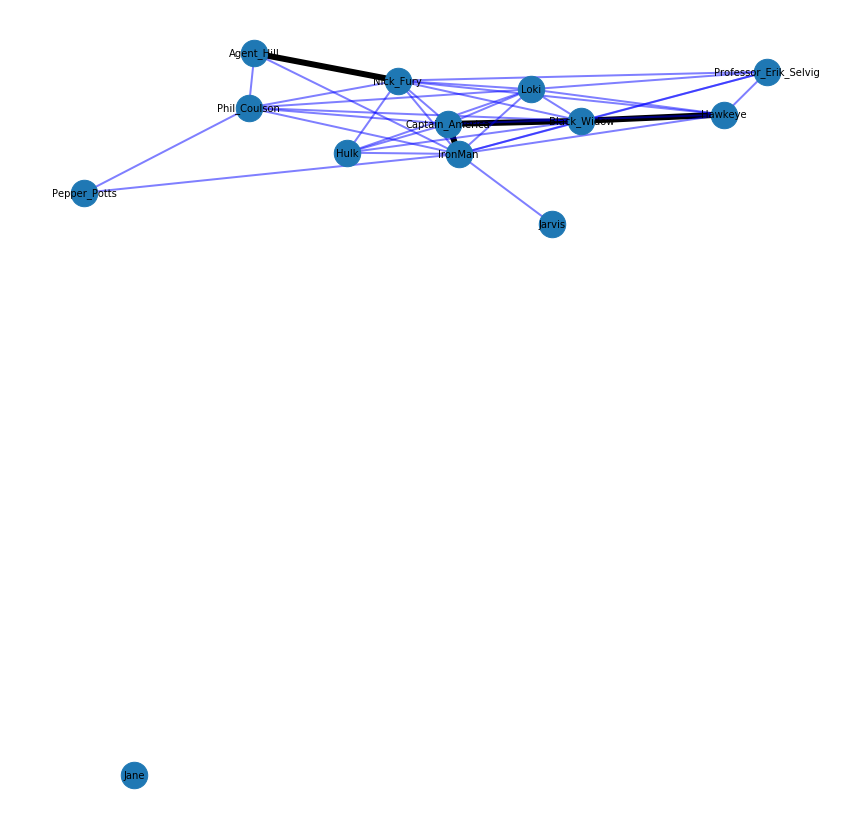

In [27]:
display_graph(a1_5percent)

In [28]:
#returns Common Neighbr Distance for given nodes x and y 
def common_neighbor_distance (g, x, y) :
    cn = len(list(nx.common_neighbors(g, x, y)))
    if(cn > 0):
        return (1 + cn)/2
    else:
        return 1/nx.shortest_path_length(g, source = x, target = y)
    
#returns Sorenson Index for given nodes x and y
def sorenson_index (g, x, y) :
    cn = len(list(nx.common_neighbors(g, x, y)))
    return 2*cn/(g.degree(x)+g.degree(y))

#Similarity between two nodes using the Hub Promoted Index
def hpi(G,x,y):
    return len(list(nx.common_neighbors(G, x, y)))/min(G.degree(x),G.degree(y))

In [29]:
#iterates through all pairs of nodes
#returns dataframe with all metric values for each pair
def metric_iterator (g) :
    df = pd.DataFrame(columns = ['CND', 'PA', 'AA', 'CN', 'SI', 'JI', 'RA', 'HPI'])
    nodes = list(g)
    for x in range(0, g.number_of_nodes()):
        for y in range(x + 1, g.number_of_nodes()):
            #call 8 metrics and add to dataframe
            scores = dict()
            scores['CND'] = round(common_neighbor_distance(g, nodes[x], nodes[y]), 3)
            scores['PA'] = int(list(nx.preferential_attachment(g, [(nodes[x], nodes[y])]))[0][2])
            scores['AA'] = round(list(nx.adamic_adar_index(g, [(nodes[x], nodes[y])]))[0][2], 3)
            scores['CN'] = len(list(nx.common_neighbors(g, nodes[x], nodes[y])))
            scores['SI'] = round(sorenson_index(g, nodes[x], nodes[y]), 3)
            scores['JI'] = round(list(nx.jaccard_coefficient(g, [(nodes[x], nodes[y])]))[0][2], 3)
            scores['RA'] = round(list(nx.resource_allocation_index(g, [(nodes[x], nodes[y])]))[0][2], 3)
            scores['HPI'] = round(hpi(g, nodes[x], nodes[y]), 3)
            newRow = pd.Series(data = scores, name = "" + nodes[x] + "," + nodes[y])
            df = df.append(newRow, ignore_index = False)
            
    return df

In [30]:
g = metric_iterator(a1_5percent)
print(g)

NetworkXNoPath: No path between Nick_Fury and Jane.

I think the reason why this doesn't work is because there is a node not linked to the main cluster of nodes. 